# Loan Status based on Borrower Features
## by Ahmed Mabrouk Fangoh

## Investigation Overview
This presentation aims to provide an overview on the main features that could be used in the prediction of a loan's status, based on a set of borrower features.

## Dataset Overview
The main focus will be **LoanStatus**. This will be used to get completed or overdue loans and determine factors that affect the category's likelihood. The features to be explored will be:

- **LoanStatus**
- **ProsperScore**
- **ListingCategory**
- **EmploymentStatus**
- **EmploymentStatusDuration**
- **IsBorrowerHomeowner**
- **OpenRevolvingAccounts**
- **DebtToIncomeRatio**
- **IncomeRange**
- **LoanOriginalAmount**

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(font_scale=.75)
sns.set_style("white")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Removing the chain assignment warning produced from using 'fillna()'
pd.options.mode.chained_assignment = None

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

df_clean = df[["LoanStatus", "ProsperScore", "ListingCategory (numeric)",
               "EmploymentStatus", "EmploymentStatusDuration", "LoanOriginalAmount"]]

# Cleaning
## Renames values that contain the string Past Due to Past Due
df_clean["LoanStatus"] = df_clean["LoanStatus"].apply(lambda x: x if "Past Due" not in x else "Past Due")

## Removing the status Cancelled as it froms only 0.0044% of of loans (5 loans)
df_clean = df_clean[df_clean["LoanStatus"] != "Cancelled"]

## Creating a ListingCategory feature to contain the string counterparts
listingcategory_dict = {0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement",
                        3: "Business", 4 : "Personal Loan", 5 : "Student Use", 6 : "Auto",
                        7 : "Other", 8 : "Baby&Adoption", 9 : "Boat", 10 : "Cosmetic Procedure",
                        11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses",
                        14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle",
                        17 : "RV", 18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"}

df_clean["ListingCategory"] = df_clean['ListingCategory (numeric)'].map(listingcategory_dict)

## Replacing null values in EmploymentStatus with Not available
df_clean["EmploymentStatus"].fillna("Not available", inplace = True)

# Misc. Functions
## Orders given series by its value counts
def orderbycount(_series, reverse = False):
    if(reverse):
        return _series.value_counts().index[::-1]
    else:
        return _series.value_counts().index

## Loan Status vs Prosper Score
- *Completed* loans tend towards a high **ProsperScore** (i.e. low risk)
- *Chargedoff* and *Past Due* loans ted towards the middle of the score

**ProsperScore** might be good at detecting loans likely to be *Completed* but is not very sensitive to *Chargedoff* and *Past Due* loans.
The score calculation may require some tweaking to increase sensitivity to *Chargedoff* and *Past Due*

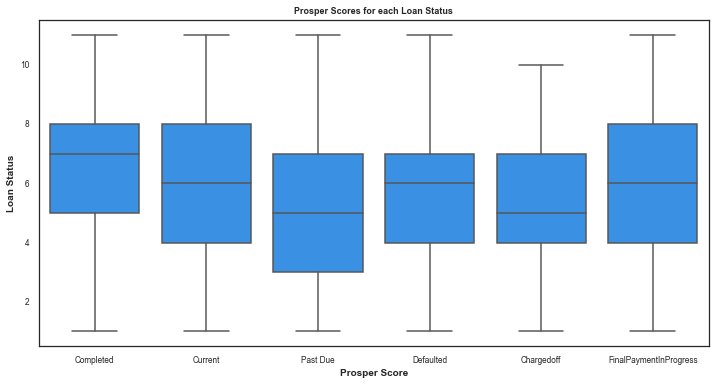

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data = df_clean, x = "LoanStatus", y = "ProsperScore", color = "dodgerblue",
                 order = ["Completed", "Current", "Past Due", "Defaulted", "Chargedoff", "FinalPaymentInProgress"])

plt.title("Prosper Scores for each Loan Status", weight="bold")

plt.xlabel("Prosper Score".title(), fontsize = 10, weight = "bold")
plt.ylabel("Loan Status".title(), fontsize = 10, weight = "bold");

## Loan Status vs Listing Categories
The **ListingCategories** *Student Use* and *Personal Loan* had the highest percentages of *Completed* loans but also the highest percentages of *Chargedoff* and *Defaulted* loans

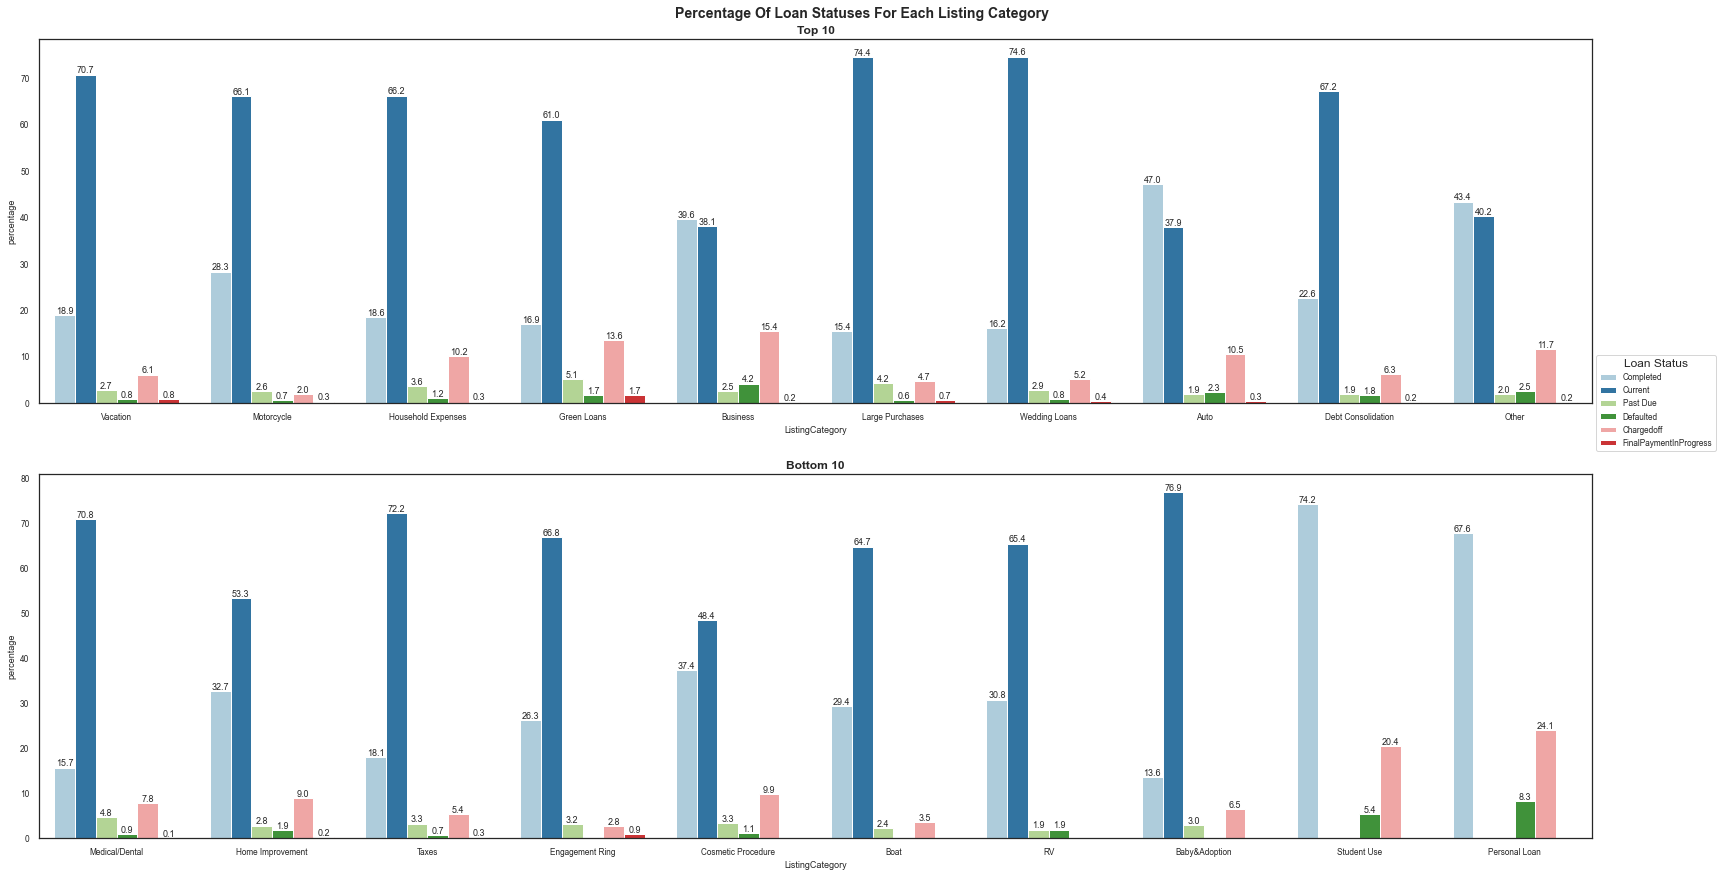

In [25]:
listcategory_loanstatus = df_clean[df_clean["ListingCategory"] != "Not Available"].groupby(["ListingCategory"])["LoanStatus"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()

fig, axs = plt.subplots(nrows=2, figsize = (24,12))

sns.barplot(x="ListingCategory", y="percentage", hue="LoanStatus", palette = "Paired", data=listcategory_loanstatus,
            hue_order = ["Completed", "Current", "Past Due", "Defaulted", "Chargedoff", "FinalPaymentInProgress"],
            order = listcategory_loanstatus["ListingCategory"].value_counts().iloc[:10].index, ax = axs[0])

sns.barplot(x="ListingCategory", y="percentage", hue="LoanStatus", palette = "Paired", data=listcategory_loanstatus,
            hue_order = ["Completed", "Current", "Past Due", "Defaulted", "Chargedoff", "FinalPaymentInProgress"],
            order = listcategory_loanstatus["ListingCategory"].value_counts().iloc[10:].index, ax = axs[1])

axs[0].set_title("Top 10".title(), fontsize=12, weight="bold")
axs[1].set_title("Bottom 10".title(), fontsize=12, weight="bold")

axs[0].legend(loc="center left", bbox_to_anchor=(1, 0), title="Loan Status", title_fontsize=12)
axs[1].get_legend().remove()

plt.suptitle("Percentage of Loan Statuses for each Listing Category".title(), y = 1.01,
            fontsize = 14, weight = "bold")

for ax in axs:
    for p in ax.patches:
            ax.annotate(format(p.get_height(), ".1f"),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 4),textcoords = 'offset points')

plt.tight_layout()

## Loan Status vs Loan Original Amount
Borrowers with a higher **LoanOriginalAmount** seem to be more likely to be *Past Due* on the loan than have it *Completed*

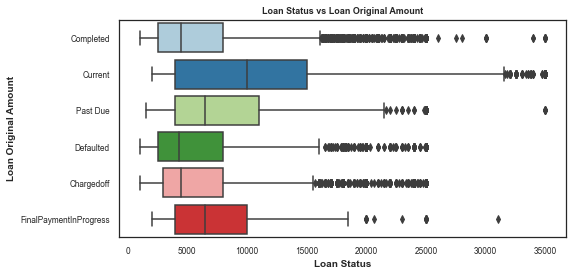

In [21]:
plt.figure(figsize=(8, 4))
ax = sns.boxplot(data = df_clean, x = "LoanOriginalAmount", y = "LoanStatus", palette = "Paired",
                 order = ["Completed", "Current", "Past Due", "Defaulted", "Chargedoff", "FinalPaymentInProgress"])

plt.title("Loan Status vs Loan Original Amount", weight="bold");

plt.xlabel("Loan Status".title(), fontsize = 10, weight = "bold")

plt.ylabel("Loan Original Amount".title(), fontsize = 10, weight = "bold");

## Loan Status vs Employment Data
*Full-time* and *Part-time* borrowers with longer **EmploymentStatusDuration** (~100 to 150) tend to be more likely to have the *Past Due* **LoanStatus**

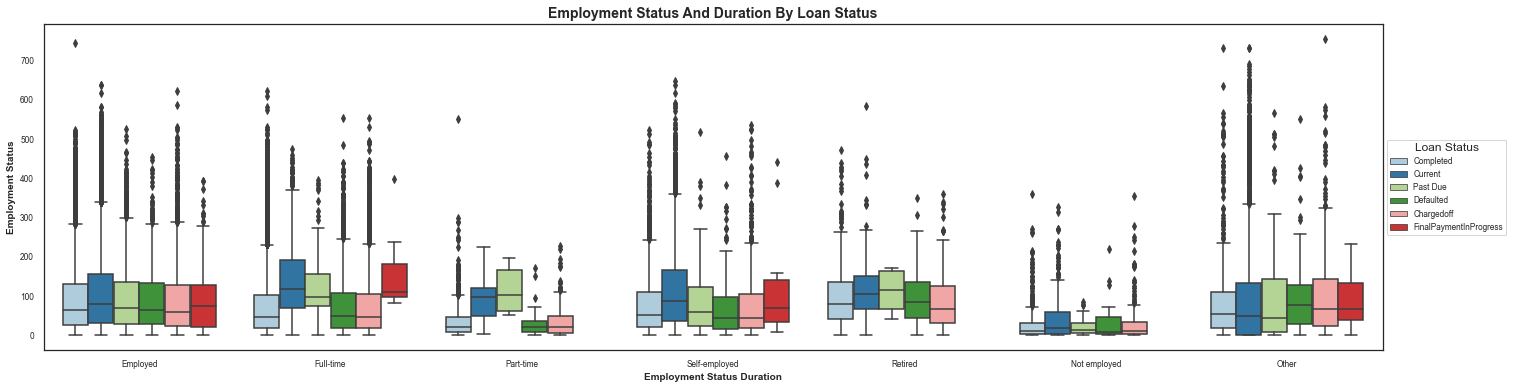

In [17]:
plt.figure(figsize=(24, 6))
ax = sns.boxplot(x = "EmploymentStatus", y = "EmploymentStatusDuration", hue = "LoanStatus", palette = "Paired", data = df_clean,
                 hue_order=["Completed", "Current", "Past Due", "Defaulted", "Chargedoff", "FinalPaymentInProgress"],
                 order=["Employed", "Full-time", "Part-time", "Self-employed", "Retired", "Not employed", "Other"])

plt.title("Employment Status and Duration by Loan Status".title(), fontsize = 14, weight = "bold")

plt.xlabel("Employment Status Duration".title(), fontsize = 10, weight = "bold")

plt.ylabel("Employment Status".title(), fontsize = 10, weight = "bold")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Loan Status", title_fontsize = 12);